Unzip datasets and prepare data:

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from multi_imbalance.datasets import load_datasets
from multi_imbalance.utils.data import construct_flat_2pc_df

%matplotlib inline
sns.set_style("darkgrid")

dataset  = load_datasets()['new_ecoli']
X, y = dataset.data, dataset.target
print(X[:5])
print(y[:5])


[[0.49 0.29 0.48 0.5  0.56 0.24 0.35]
 [0.07 0.4  0.48 0.5  0.54 0.35 0.44]
 [0.56 0.4  0.48 0.5  0.49 0.37 0.46]
 [0.59 0.49 0.48 0.5  0.52 0.45 0.36]
 [0.23 0.32 0.48 0.5  0.55 0.25 0.35]]
[0 0 0 0 0]


## Binary classification problem
Basic CCR will treat multi-class data as binary problem by treating a class with the lowest count as a minority class and the rest of classes as a majority class

Resample data using CCR algorithm with energy high enough for translation to be visible on the plots

In [2]:
from multi_imbalance.resampling.ccr import CCR

clf = CCR(energy=0.5)
resampled_X, resampled_y = clf.fit_resample(X, y)

Compare results by plotting data in 2 dimensions

<AxesSubplot: title={'center': 'CCR'}, xlabel='x1', ylabel='x2'>

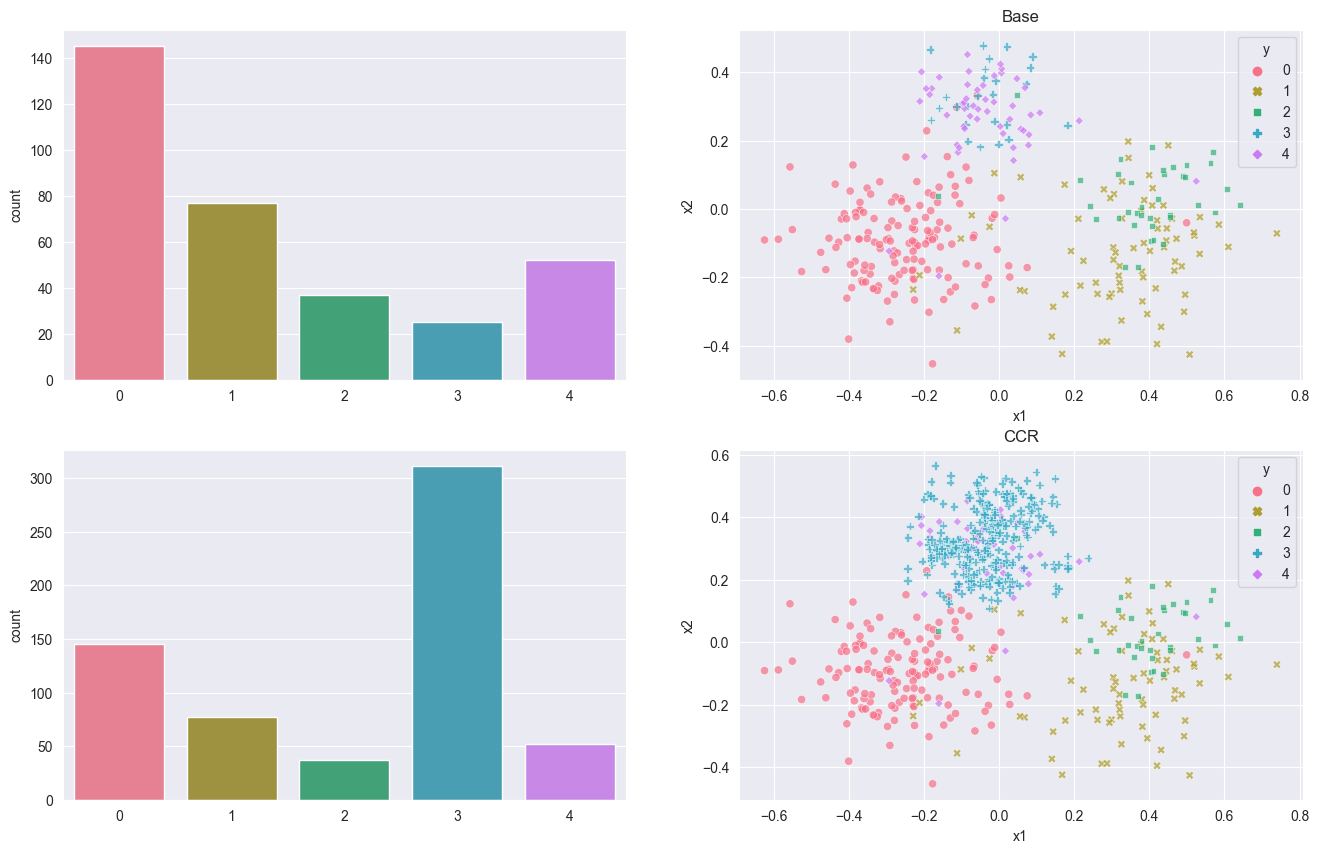

In [3]:
n = len(Counter(y).keys())
p = sns.color_palette("husl", n)

pca = PCA(n_components=2)
pca.fit(X)

fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 10)
axs = axs.flatten()

axs[1].set_title("Base")
sns.countplot(x=y, ax=axs[0], palette=p)
X = pca.transform(X)
df = construct_flat_2pc_df(X, y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[1],
    legend="full",
    palette=p,
)


axs[3].set_title("CCR")
sns.countplot(x=resampled_y, ax=axs[2], palette=p)
resampled_X = pca.transform(resampled_X)
df = construct_flat_2pc_df(resampled_X, resampled_y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[3],
    legend="full",
    palette=p,
)

## Multi-class classification problem

MultiClass CCR will perform CCR for each class while using sample of data from other classes as majority

In [4]:
from multi_imbalance.resampling.ccr import MultiClassCCR

clf = MultiClassCCR(energy=0.5)
resampled_X, resampled_y = clf.fit_resample(X, y)

<AxesSubplot: title={'center': 'MultiClassCCR'}, xlabel='x1', ylabel='x2'>

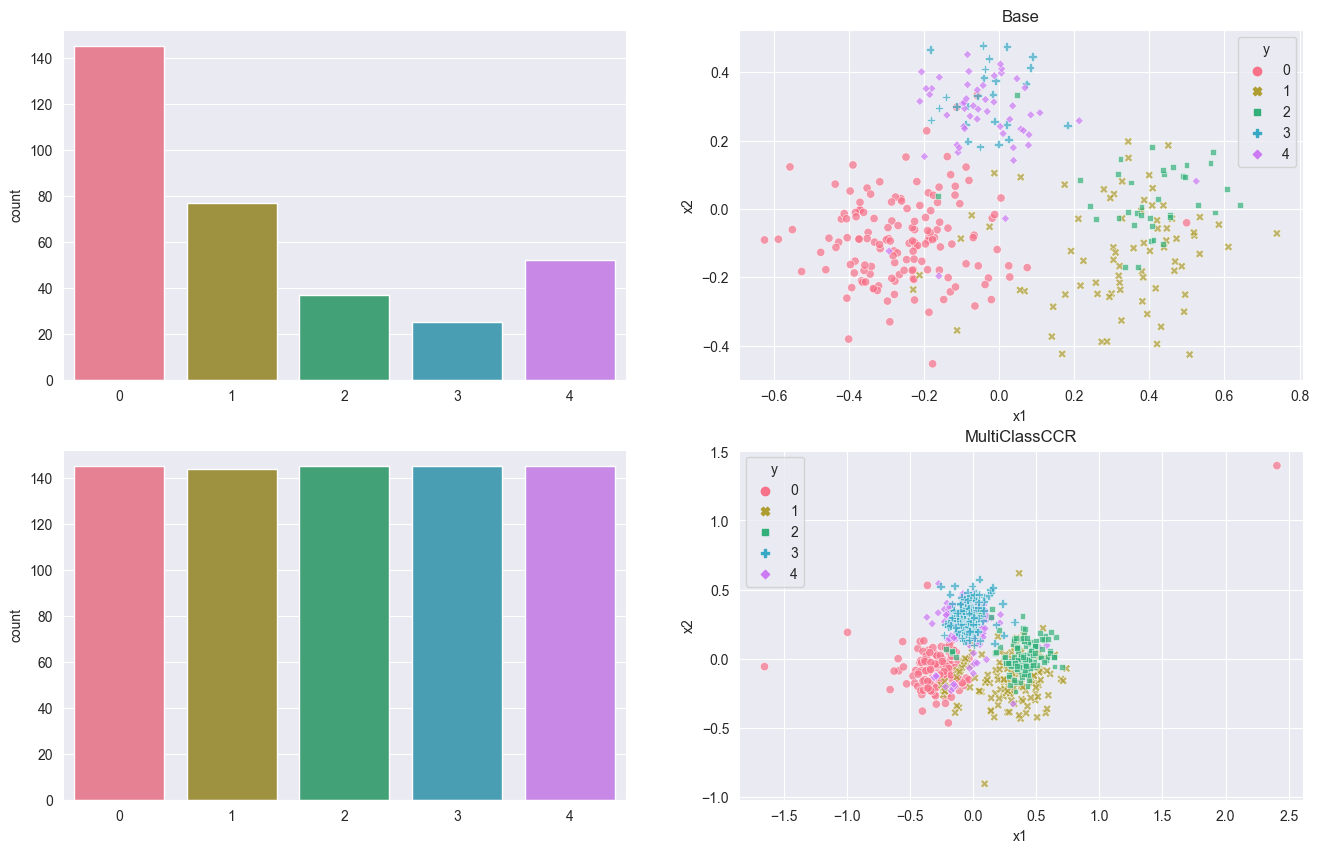

In [5]:
n = len(Counter(y).keys())
p = sns.color_palette("husl", n)

pca = PCA(n_components=2)
pca.fit(X)

fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16, 10)
axs = axs.flatten()

axs[1].set_title("Base")
sns.countplot(x=y, ax=axs[0], palette=p)
X = pca.transform(X)
df = construct_flat_2pc_df(X, y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[1],
    legend="full",
    palette=p,
)

axs[3].set_title("MultiClassCCR")
sns.countplot(x=resampled_y, ax=axs[2], palette=p)
resampled_X = pca.transform(resampled_X)
df = construct_flat_2pc_df(resampled_X, resampled_y)
sns.scatterplot(
    x="x1",
    y="x2",
    hue="y",
    style="y",
    data=df,
    alpha=0.7,
    ax=axs[3],
    legend="full",
    palette=p,
)